# Gaussian Discriminant Analysis

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt("gaussian_discriminant_analysis.csv", dtype=np.float64, delimiter=",")
df = pd.DataFrame(data, columns=["x1", "x2", "y"])
df

,x1,x2,y
0,-0.590912,0.221098,0.0
1,-0.366340,1.578768,0.0
2,1.111379,3.185019,0.0
3,0.329676,2.633543,0.0
4,1.259236,3.327122,0.0
...,...,...,...
95,7.022479,8.766867,1.0
96,5.648007,7.634303,1.0
97,6.656152,10.248755,1.0
98,5.584119,7.739545,1.0


In [ ]:
df.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,3.927237,5.027441,0.500000
std,3.137358,3.340557,0.502519
min,-0.651939,-0.552670,0.000000
25%,0.961299,1.870980,0.000000
50%,3.645872,4.503459,0.500000
75%,6.917812,8.144461,1.000000
max,9.811431,11.771933,1.000000


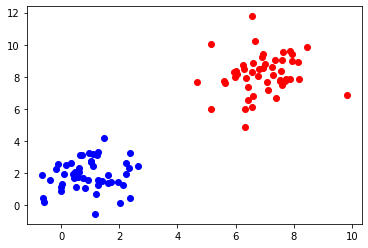

In [ ]:
pos_data = data[data[:,-1]==1]
neg_data = data[data[:,-1]==0]
plt.scatter(pos_data[:,0], pos_data[:,1], color="red");
plt.scatter(neg_data[:,0], neg_data[:,1], color="blue");
plt.show()

In [ ]:
class GDA():
    def __init__(self):
        self.phi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma = None
    def train(self, x, y):
        self.phi = np.mean(y)
        self.mu0 = np.mean(x[y[:,0]==0], axis=0)
        self.mu1 = np.mean(x[y[:,0]==1], axis=0)
        n_x = x[y[:,0]==0] - self.mu0
        p_x = x[y[:,0]==1] - self.mu1
        self.sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/x.shape[0]

In [ ]:
X_train = data[:,:2]
Y_train = data[:,-1:]
gda = GDA()
gda.train(X_train, Y_train)
phi = gda.phi
sigma = gda.sigma
inv_sigma = np.linalg.inv(sigma)
mu0 = gda.mu0.reshape(-1, 1)
mu1 = gda.mu1.reshape(-1, 1)

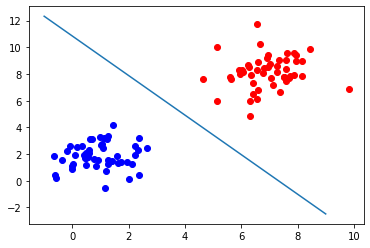

In [ ]:
k = (2 * inv_sigma).dot(mu1-mu0)
b = (mu1.T).dot(inv_sigma).dot(mu1) - (mu0.T).dot(inv_sigma).dot(mu0) + np.log(phi) - np.log(1-phi)
x1 = np.arange(-1, 10, 1)
x2 = (b[0][0] - k[0][0]*x1)/k[1][0]
plt.scatter(pos_data[:,0], pos_data[:,1], color="red")
plt.scatter(neg_data[:,0], neg_data[:,1], color="blue")
plt.plot(x1, x2)
plt.show()

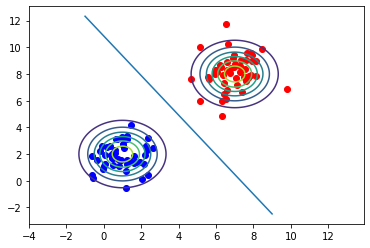

In [ ]:
xgrid1 = np.arange(-4, 4, 0.1)
ygrid1 = np.arange(-1, 6, 0.1)
xgrid0 = np.arange(4, 14, 0.1)
ygrid0 = np.arange(5, 12, 0.1)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)
X0, Y0 = np.meshgrid(xgrid0, ygrid0)
Z1 = np.exp(-0.35*((X1-1)**2+0.85*(Y1-2)**2))
Z0 = np.exp(-0.35*((X0-7)**2+0.85*(Y0-8)**2))
CS1 = plt.contour(X1, Y1, Z1)
CS0 = plt.contour(X0, Y0, Z0)
plt.scatter(pos_data[:,0], pos_data[:,1], color="red")
plt.scatter(neg_data[:,0], neg_data[:,1], color="blue")
plt.plot(x1, x2)
plt.show()